# <div style="color:white;display:fill;border-radius:5px;background-color:#606060;font-family:Didot;overflow:hidden"><p style="padding:18px;color:white;overflow:hidden;font-size:110%;letter-spacing:0.5px;margin:0"><b>1 |</b>Import library</p></div>

In [4]:
import pandas as pd
from sklearn import preprocessing
from sklearn.cluster import DBSCAN
from tabulate import tabulate
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
import seaborn as sns
import numpy as np
# importing required libraries for normalizing data
from sklearn.preprocessing import StandardScaler,LabelBinarizer,MinMaxScaler
from sklearn.neighbors import NearestNeighbors
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from keras.layers import Dense, MaxPool1D, Flatten, Dropout,Conv1D , BatchNormalization,Input
from keras.models import Sequential,Model # importing dense layer
# representation of model layers
#from keras.utils.vis_utils import plot_model
from keras.utils import plot_model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# <div style="color:white;display:fill;border-radius:5px;background-color:#47747a;font-family:Didot;overflow:hidden"><p style="padding:18px;color:white;overflow:hidden;font-size:110%;letter-spacing:0.5px;margin:0"><b>2 |</b>Load data</p></div>

In [7]:
# Initialize an empty list to store DataFrames
dfs = []
# Browse through CSV files and read them into DataFrames
for i in range(0,3):
    #filename = f"/kaggle/input/cic-iot-2023/part-0000{i}-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv"
    filename = f"C:/Users/Pc/Desktop/Masters Project/Dataset_CICIOT_2023/part-0000{i}-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv"
    if i >=10 :
        #filename = f"/kaggle/input/cic-iot-2023/part-000{i}-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv"
        filename = f"C:/Users/Pc/Desktop/Masters Project/Dataset_CICIOT_2023/part-000{i}-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv"
    # New data to test
    df = pd.read_csv(filename)
    dfs.append(df)
df_test = pd.read_csv(f"C:/Users/Pc/Desktop/Masters Project/Dataset_CICIOT_2023/part-00005-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv")
#df = pd.read_csv('normal_data.csv')
#dfs.append(df)
# Merge DataFrames into one large DataFrame
df = pd.concat(dfs)
#df = pd.read_csv("CICIoT2023/part-00001-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv")
#labels_to_remove = ['DictionaryBruteForce', 'BrowserHijacking', 'XSS', 'Uploading_Attack', 'SqlInjection', 'CommandInjection', 'Backdoor_Malware']

# Filter the DataFrame to keep only rows with labels not in 'labels_to_remove'
#df = df[~df['label'].isin(labels_to_remove)]

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 732750 entries, 0 to 275257
Data columns (total 47 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   flow_duration    732750 non-null  float64
 1   Header_Length    732750 non-null  float64
 2   Protocol Type    732750 non-null  float64
 3   Duration         732750 non-null  float64
 4   Rate             732750 non-null  float64
 5   Srate            732750 non-null  float64
 6   Drate            732750 non-null  float64
 7   fin_flag_number  732750 non-null  float64
 8   syn_flag_number  732750 non-null  float64
 9   rst_flag_number  732750 non-null  float64
 10  psh_flag_number  732750 non-null  float64
 11  ack_flag_number  732750 non-null  float64
 12  ece_flag_number  732750 non-null  float64
 13  cwr_flag_number  732750 non-null  float64
 14  ack_count        732750 non-null  float64
 15  syn_count        732750 non-null  float64
 16  fin_count        732750 non-null  float64
 

# <div style="color:white;display:fill;border-radius:5px;background-color:#47747a;font-family:Didot;overflow:hidden"><p style="padding:18px;color:white;overflow:hidden;font-size:110%;letter-spacing:0.5px;margin:0"> <b>3 |</b>Data visualization </p></div>

C:\Users\Pc\AppData\Local\Temp\ipykernel_10468\1061347903.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(df["label"].value_counts().index, rotation=45, ha='right')


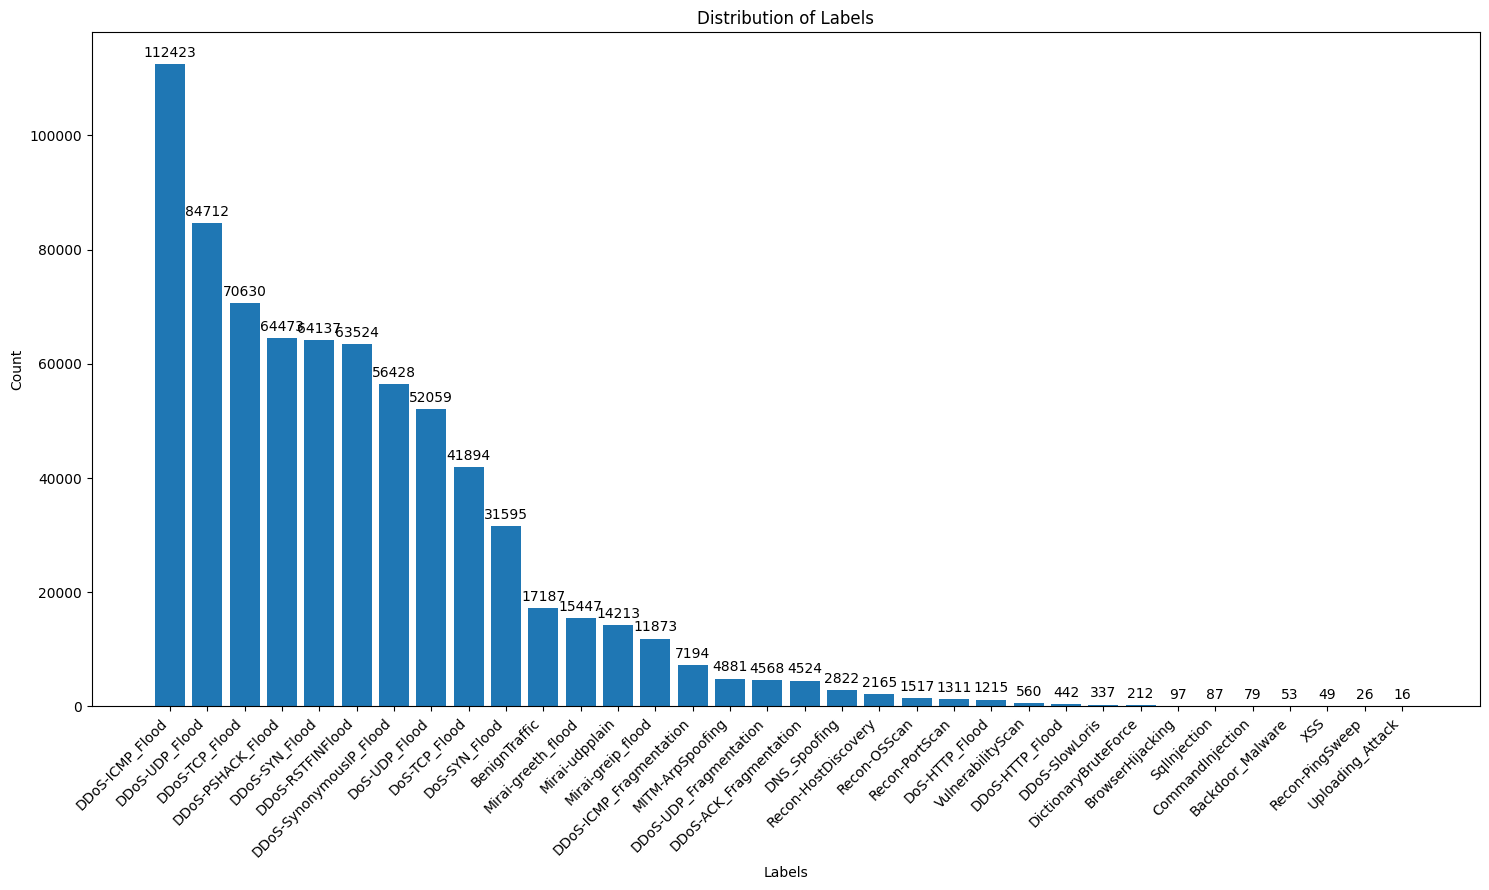

In [9]:
# Create a column chart
fig, ax = plt.subplots(figsize=(15, 9))
bars = ax.bar(df["label"].value_counts().index, df["label"].value_counts().values, width=0.8)

# Rotate the label on the x axis
ax.set_xticklabels(df["label"].value_counts().index, rotation=45, ha='right')

# Format numbers on the y axis
ax.yaxis.set_major_formatter('{:.0f}'.format)

# Add labels and titles
ax.set_xlabel('Labels')
ax.set_ylabel('Count')
ax.set_title('Distribution of Labels')

# Display exact figures at the top of each column
for bar in bars:
    height = bar.get_height()
    ax.annotate('{}'.format(height),
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),
                textcoords="offset points",
                ha='center', va='bottom')

plt.tight_layout()
plt.show()

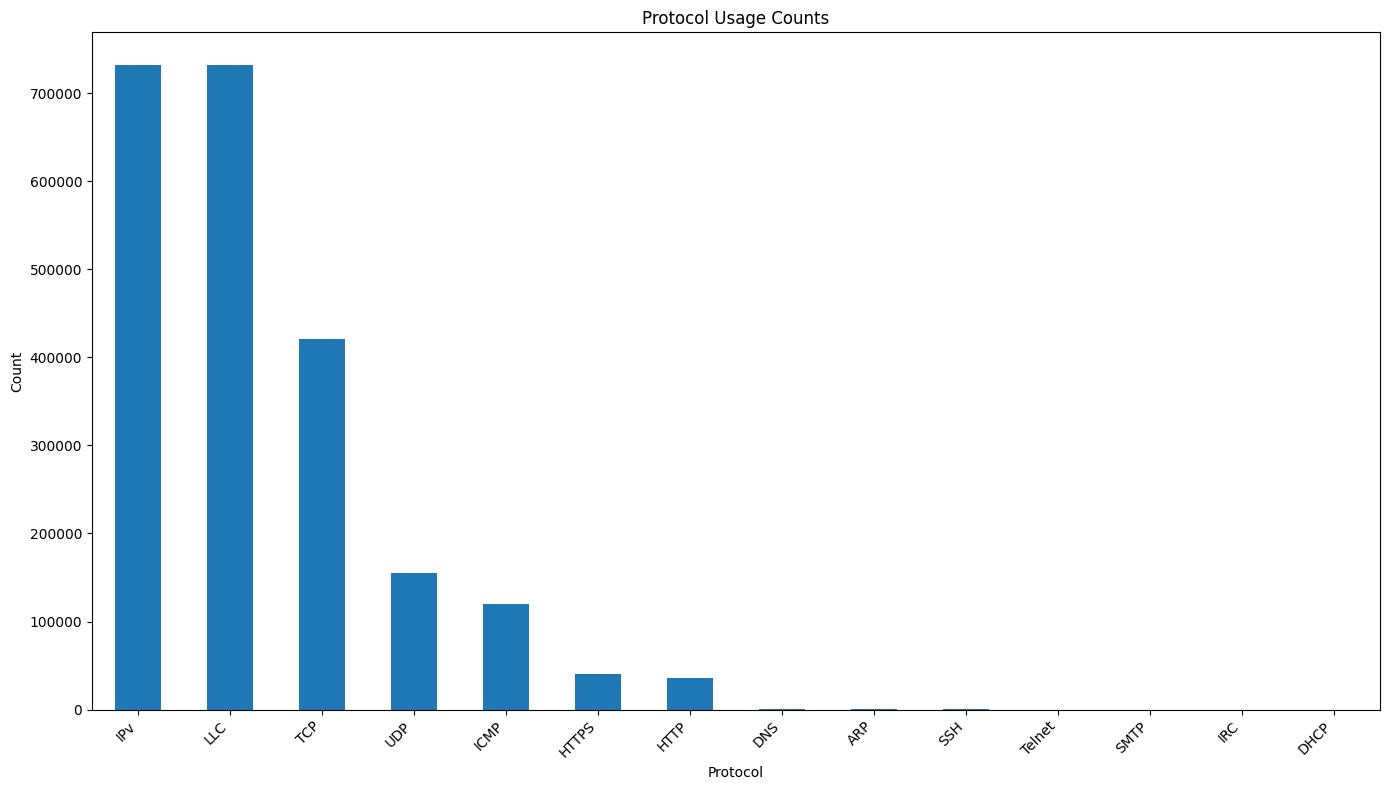

In [10]:
protocols = ['HTTP', 'HTTPS', 'DNS', 'Telnet', 'SMTP', 'SSH', 'IRC', 'TCP', 'UDP', 'DHCP', 'ARP', 'ICMP', 'IPv', 'LLC']
protocol_counts = df[protocols].sum().sort_values(ascending=False)

# Now let's plot the protocol usage
plt.figure(figsize=(14, 8))
protocol_counts.plot(kind='bar')
plt.title('Protocol Usage Counts')
plt.xlabel('Protocol')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate the x-axis labels for better fit
plt.tight_layout()  # Adjust layout
plt.show()

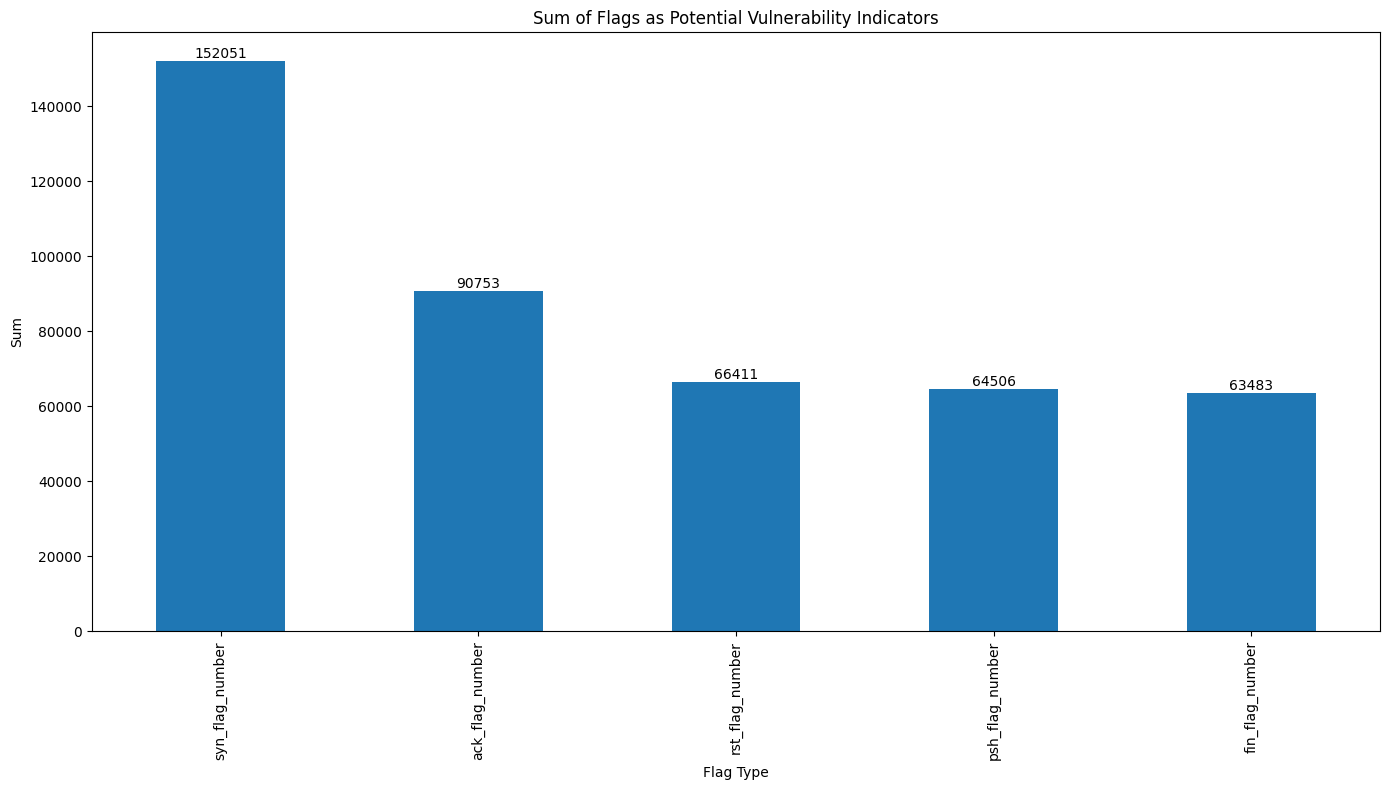

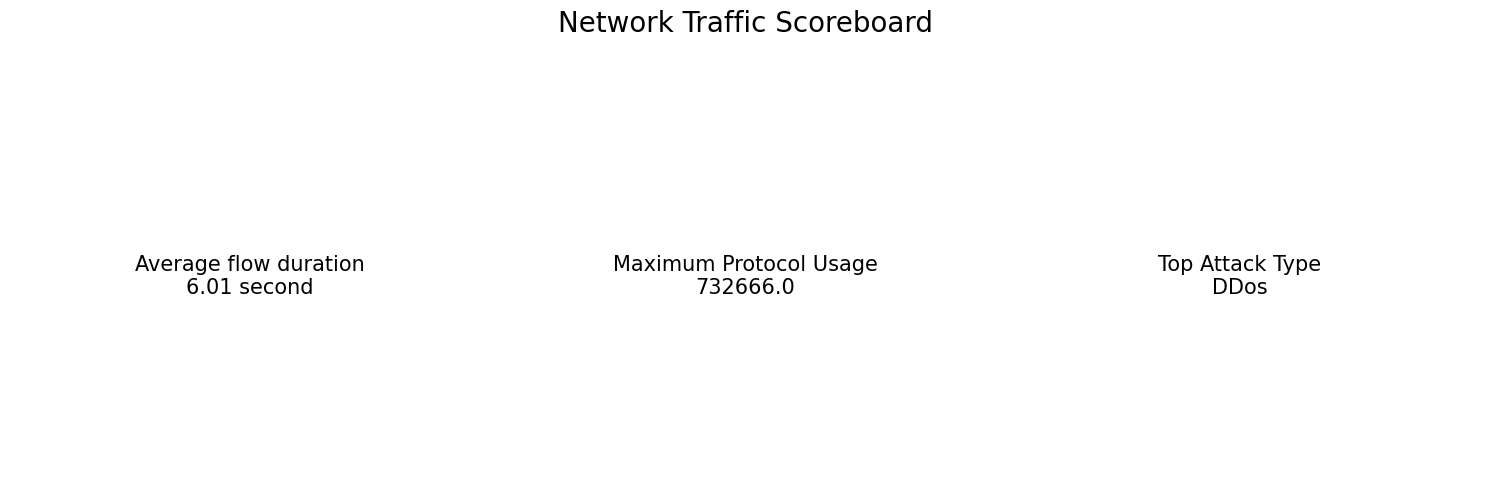

In [39]:
plt.figure(figsize=(14, 8))
flags = ['fin_flag_number', 'syn_flag_number', 'rst_flag_number', 'psh_flag_number', 'ack_flag_number']
df_flags = df[flags].sum().sort_values(ascending=False)
df_flags.plot(kind='bar')

plt.title('Sum of Flags as Potential Vulnerability Indicators')
plt.xlabel('Flag Type')
plt.ylabel('Sum')
for index, value in enumerate(df_flags):
    plt.text(index, value, f'{value:.0f}', ha='center', va='bottom')  # Add text labels on bars
plt.tight_layout()
plt.show()

#import matplotlib.pyplot as plt
#from matplotlib.font_manager import FontProperties

# Choose a font that supports Vietnamese, for example: VNI-Times
#font_path = "/path/to/vni-times.ttf"  # Change the path to the corresponding font
#custom_font = FontProperties(fname=font_path)

# Example metrics for the scorecard
average_flow_duration = df['flow_duration'].mean()
max_protocol_usage = df[protocols].sum().max()
top_attack_type = df['label'].value_counts().idxmax()

# Create the figure
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
#fig.suptitle('Network Traffic Scoreboard', fontsize=20, fontproperties=custom_font)
fig.suptitle('Network Traffic Scoreboard', fontsize=20)

# Scoreboard for Average flow duration
#axs[0].text(0.5, 0.5, f'Average flow duration\n{average_flow_duration:.2f} giây', fontsize=15, 
#            ha='center', va='center', fontproperties=custom_font)
axs[0].text(0.5, 0.5, f'Average flow duration\n{average_flow_duration:.2f} second', fontsize=15, ha='center', va='center')
axs[0].set_axis_off()

# Scorecard for Maximum Protocol Usage
axs[1].text(0.5, 0.5, f'Maximum Protocol Usage\n{max_protocol_usage}', fontsize=15, ha='center', va='center')
axs[1].set_axis_off()

# Scoreboard for Top Attack Types
axs[2].text(0.5, 0.5, f'Top Attack Type\n{top_attack_type}', fontsize=15,  ha='center', va='center')
axs[2].set_axis_off()

# Adjust the layout and display
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()




In [31]:
df_flags

syn_flag_number    152051.0
ack_flag_number     90753.0
rst_flag_number     66411.0
psh_flag_number     64506.0
fin_flag_number     63483.0
dtype: float64

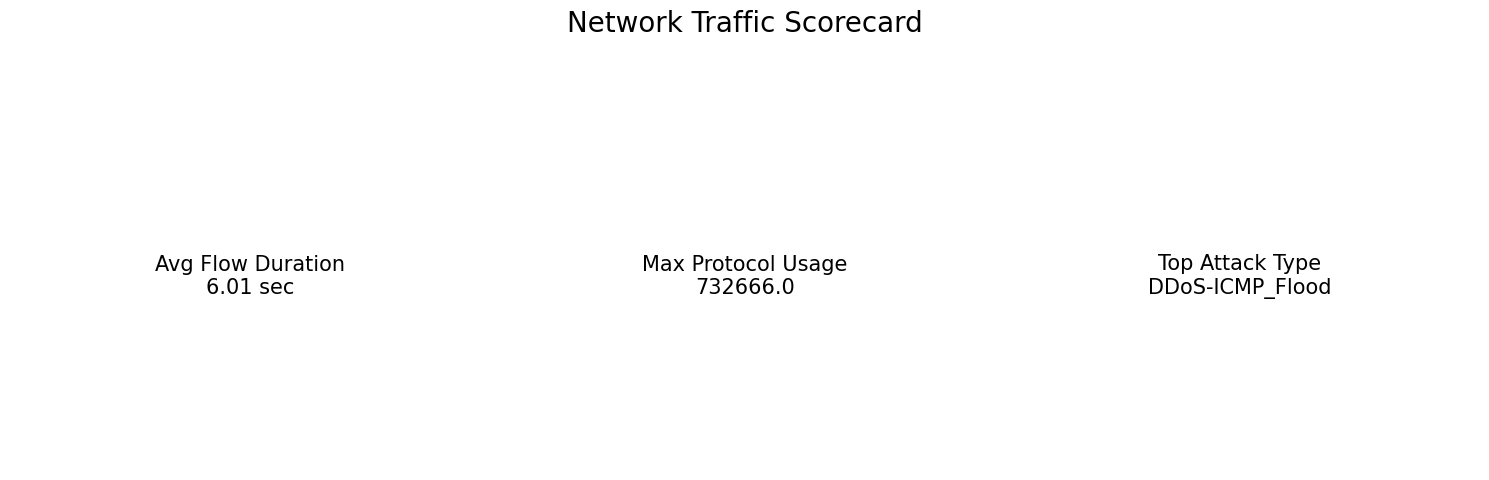

In [23]:
# Example metrics for the scorecard
average_flow_duration = df['flow_duration'].mean()
max_protocol_usage = df[protocols].sum().max()
top_attack_type = df['label'].value_counts().idxmax()

# Create the figure
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('Network Traffic Scorecard', fontsize=20)

# Scorecard for Average Flow Duration
axs[0].text(0.5, 0.5, f'Avg Flow Duration\n{average_flow_duration:.2f} sec', fontsize=15, 
            ha='center', va='center')
axs[0].set_axis_off()

# Scorecard for Max Protocol Usage
axs[1].text(0.5, 0.5, f'Max Protocol Usage\n{max_protocol_usage}', fontsize=15, 
            ha='center', va='center')
axs[1].set_axis_off()

# Scorecard for Top Attack Type
axs[2].text(0.5, 0.5, f'Top Attack Type\n{top_attack_type}', fontsize=15, 
            ha='center', va='center')
axs[2].set_axis_off()

# Adjust the layout and display
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# **Collect labels into 7 main categories**

In [24]:
# class classification 
def change_label(df):
  df.label.replace(['DDoS-ICMP_Flood','DDoS-UDP_Flood','DDoS-TCP_Flood','DDoS-PSHACK_Flood','DDoS-SYN_Flood','DDoS-RSTFINFlood','DDoS-SynonymousIP_Flood','DDoS-ICMP_Fragmentation','DDoS-UDP_Fragmentation','DDoS-ACK_Fragmentation','DDoS-HTTP_Flood','DDoS-SlowLoris'],'DDos',inplace=True)
  df.label.replace(['DoS-UDP_Flood','DoS-TCP_Flood','DoS-SYN_Flood','DoS-HTTP_Flood'],'DoS',inplace=True)      
  df.label.replace(['Recon-HostDiscovery','Recon-OSScan','Recon-PortScan','Recon-PingSweep','VulnerabilityScan'],'Recon',inplace=True)
  df.label.replace(['MITM-ArpSpoofing','DNS_Spoofing'],'Spoofing',inplace=True)
  df.label.replace(['DictionaryBruteForce'],'BruteForce',inplace=True)
  df.label.replace(['BrowserHijacking','XSS','Uploading_Attack','SqlInjection','CommandInjection','Backdoor_Malware'],'Web-based',inplace=True)
  df.label.replace(['Mirai-greeth_flood','Mirai-udpplain','Mirai-greip_flood'],'Mirai',inplace=True)
  df.label.replace(['BenignTraffic'],'BENIGN',inplace=True)
change_label(df)
change_label(df_test)

# change_label(test_data)

In [25]:
df_DDOS = df[df['label'].isin(['DDos', 'BENIGN'])]
df_DDOS_test = df_test[df_test['label'].isin(['DDos', 'BENIGN'])]

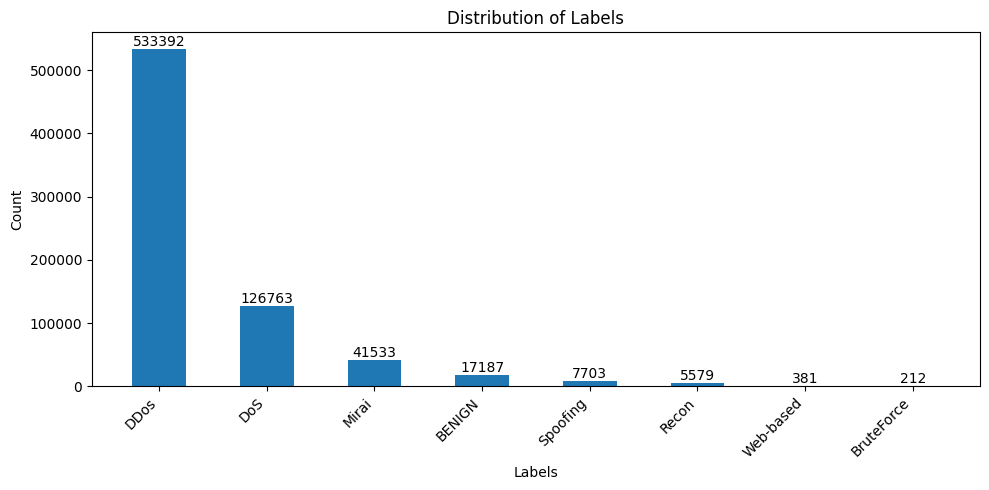

In [29]:
x_label_distribute = np.array(
   df["label"].value_counts().index.tolist())
y_label_distribute = np.array(
    df["label"].value_counts().values.tolist())
# Create a new Figure with dimensions 10 wide and 5 high
fig = plt.figure(figsize=(10, 5))

# Draw a column chart and display exact figures on top of each column
bar_width=.5
bars = plt.bar(x_label_distribute, y_label_distribute, width=bar_width, align='center')
plt.bar_label(bars, label_type='edge', fontsize=10)

# Rotate the label on the x axis
plt.xticks(rotation=45, ha='right')

# Format numbers on the y axis
plt.gca().yaxis.set_major_formatter('{:.0f}'.format)

# Add labels and titles
plt.xlabel('Labels')
plt.ylabel('Count')
plt.title('Distribution of Labels')
plt.tight_layout()

plt.show()


# <div style="color:white;display:fill;border-radius:5px;background-color:#47747a;font-family:Didot;overflow:hidden"><p style="padding:18px;color:white;overflow:hidden;font-size:110%;letter-spacing:0.5px;margin:0"><b>4 |</b>Transformation and standardization </p></div>

In [40]:
# tạo datafreame labels (Dos,Probe,R2L,U2R,normal)
label = pd.DataFrame(df.label)

In [41]:
# Scale data will convert scale data or data format to the same range to avoid too large data affecting the model
# Scale data for each numeric feature with the train dataset
# Scale using MinMaxScaler to avoid negative values
# Here we only need to scale numeric features and numeric attributes because only numeric attributes have a large range
def scaleStandardData(dataFrame, numeric_cols):
  scaler = preprocessing.StandardScaler()
  for col in numeric_cols:
    arr = dataFrame[col]
    arr = np.array(arr)
    dataFrame[col] = scaler.fit_transform(arr.reshape(len(arr),1))
  return dataFrame

def scaleMinMaxData(dataFrame, numeric_cols):
  scaler = preprocessing.MinMaxScaler()
  for col in numeric_cols:
    arr = dataFrame[col]
    arr = np.array(arr)
    dataFrame[col] = scaler.fit_transform(arr.reshape(len(arr),1))
  return dataFrame

def scaleData(dataFrame, numeric_cols):
  dataFrame = scaleStandardData(dataFrame, numeric_cols)
  dataFrame = scaleMinMaxData(dataFrame, numeric_cols)
  return dataFrame

In [42]:
Y_TRAIN = df_DDOS['label']
Y_TEST = df_DDOS_test['label']
X_TRAIN = df_DDOS.drop('label', axis=1).copy()
X_TEST = df_DDOS_test.drop('label', axis=1).copy()

In [49]:
import numpy as np

# Convert all float64 columns to float128
# float_cols = X_TRAIN.select_dtypes(include=['float64']).columns
# X_TRAIN[float_cols] = X_TRAIN[float_cols].astype(np.float128)
# float_cols = X_TEST.select_dtypes(include=['float64']).columns
# X_TEST[float_cols] = X_TEST[float_cols].astype(np.float128)

In [50]:
Y_TRAIN = Y_TRAIN.replace({'BENIGN': 0, 'DDos': 1,'DoS':2,'Mirai':3,'Spoofing':4,'Recon':5,'Web-based':6,'BruteForce':7})
Y_TEST = Y_TEST.replace({'BENIGN': 0, 'DDos': 1,'DoS':2,'Mirai':3,'Spoofing':4,'Recon':5,'Web-based':6,'BruteForce':7})

# <div style="color:white;display:fill;border-radius:5px;background-color:#47747a;font-family:Didot;overflow:hidden"><p style="padding:18px;color:white;overflow:hidden;font-size:110%;letter-spacing:0.5px;margin:0"><b>5 |</b>Feature Selection </p></div>

In [51]:
numeric_features = X_TRAIN.select_dtypes(include='number').columns
# Scale for common data
X_TRAIN = scaleData(X_TRAIN, numeric_features)

In [52]:
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
# Apply RFE to remove features that have a weak impact on the data
# RFE applies a decision tree algorithm to find features with weak impact
# In the report, 30 features with the greatest impact were selected
clf = DecisionTreeClassifier(random_state=0)
rfe = RFE(estimator=clf, n_features_to_select=30, step=1)
rfe.fit(X_TRAIN, Y_TRAIN.astype(int))
X_rfeTrain=rfe.transform(X_TRAIN)
true=rfe.support_
rfecolindex_train=[i for i, x in enumerate(true) if x]
rfecolname_train=list(numeric_features[i] for i in rfecolindex_train)

In [53]:
X_TRAIN.head()

,flow_duration,Header_Length,Protocol Type,Duration,Rate,Srate,Drate,fin_flag_number,syn_flag_number,rst_flag_number,...,AVG,Std,Tot size,IAT,Number,Magnitue,Radius,Covariance,Variance,Weight
0,0.000000,0.000006,0.352941,0.253516,4.493266e-08,4.493266e-08,0.0,1.0,0.0,1.0,...,0.001535,0.000000,0.000919,0.500484,0.607143,1.097532e-02,0.000000,0.000000e+00,0.00,0.57697
2,0.000000,0.000000,0.058824,0.253516,4.549953e-06,4.549953e-06,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.499188,0.607143,1.734723e-17,0.000000,0.000000e+00,0.00,0.57697
6,0.000016,0.000011,0.352941,0.253516,2.591750e-07,2.591750e-07,0.0,0.0,1.0,0.0,...,0.001535,0.000000,0.000919,0.500614,0.607143,1.097532e-02,0.000000,0.000000e+00,0.00,0.57697
9,0.000000,0.000006,0.352941,0.253516,1.531812e-06,1.531812e-06,0.0,0.0,1.0,0.0,...,0.001557,0.000056,0.000934,0.498954,0.607143,1.112613e-02,0.000056,2.370270e-08,0.12,0.57697
10,0.000003,0.000006,0.359412,0.256051,1.238126e-06,1.238126e-06,0.0,0.0,0.0,0.0,...,0.001592,0.000154,0.000978,0.500406,0.607143,1.135133e-02,0.000154,2.341175e-07,0.09,0.57697


In [58]:
rfe.fit(X_TRAIN, Y_TRAIN.astype(int))
X_rfeTrain=rfe.transform(X_TRAIN)
true=rfe.support_
rfecolindex_train=[i for i, x in enumerate(true) if x]
rfecolname_train=list(numeric_features[i] for i in rfecolindex_train)

In [59]:
# Print features that greatly affect the dataset
print('Features selected for Train:',rfecolname_train)

Features selected for Train: ['flow_duration', 'Header_Length', 'Protocol Type', 'Duration', 'Rate', 'Srate', 'Drate', 'fin_flag_number', 'syn_flag_number', 'psh_flag_number', 'cwr_flag_number', 'ack_count', 'syn_count', 'fin_count', 'urg_count', 'rst_count', 'HTTP', 'TCP', 'DHCP', 'ARP', 'ICMP', 'Tot sum', 'Min', 'Max', 'Tot size', 'IAT', 'Number', 'Magnitue', 'Variance', 'Weight']


In [62]:
pd.DataFrame(X_rfeTrain).head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,0.000000,0.000006,0.352941,0.253516,4.493266e-08,4.493266e-08,0.0,1.0,0.0,0.0,...,0.0,0.007690,0.003556,0.000396,0.000919,0.500484,0.607143,1.097532e-02,0.00,0.57697
1,0.000000,0.000000,0.058824,0.253516,4.549953e-06,4.549953e-06,0.0,0.0,0.0,0.0,...,1.0,0.005845,0.000000,0.000000,0.000000,0.499188,0.607143,1.734723e-17,0.00,0.57697
2,0.000016,0.000011,0.352941,0.253516,2.591750e-07,2.591750e-07,0.0,0.0,1.0,0.0,...,0.0,0.007690,0.003556,0.000396,0.000919,0.500614,0.607143,1.097532e-02,0.00,0.57697
3,0.000000,0.000006,0.352941,0.253516,1.531812e-06,1.531812e-06,0.0,0.0,1.0,0.0,...,0.0,0.007725,0.003556,0.000475,0.000934,0.498954,0.607143,1.112613e-02,0.12,0.57697
4,0.000003,0.000006,0.359412,0.256051,1.238126e-06,1.238126e-06,0.0,0.0,0.0,1.0,...,0.0,0.007792,0.003556,0.000625,0.000978,0.500406,0.607143,1.135133e-02,0.09,0.57697


In [63]:
# List of selected important features
selected_features = ['flow_duration', 'Header_Length', 'Protocol Type', 'Duration', 'Rate', 'Srate', 'syn_flag_number', 'psh_flag_number', 'ack_flag_number', 'ack_count', 'syn_count', 'fin_count', 'urg_count', 'rst_count', 'HTTP', 'HTTPS', 'UDP', 'Tot sum', 'Min', 'Max', 'AVG', 'Std', 'Tot size', 'IAT', 'Number', 'Magnitue', 'Radius', 'Covariance', 'Variance', 'Weight']

# Select important features from the training set
X_rfeTrain = X_TRAIN.loc[:, selected_features]
X_TEST = X_TEST.loc[:, selected_features]

In [64]:
X_train, X_test, Y_train, Y_test = train_test_split(X_rfeTrain, Y_TRAIN, test_size=0.2, random_state=42)

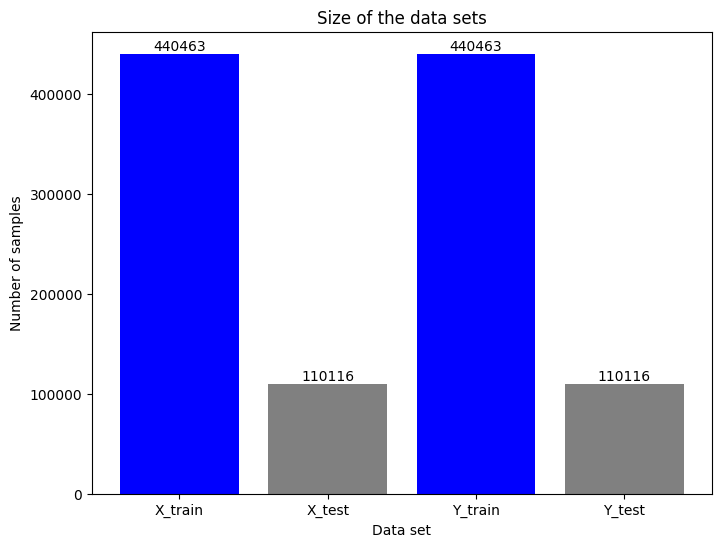

In [65]:
# Data set size
sizes = [X_train.shape[0], X_test.shape[0], Y_train.shape[0], Y_test.shape[0]]
labels = ['X_train', 'X_test', 'Y_train', 'Y_test']

# Draw a column chart
plt.figure(figsize=(8, 6))
bars = plt.bar(labels, sizes, color=['blue', 'grey', 'blue', 'grey'])
plt.xlabel('Data set')
plt.ylabel('Number of samples')
plt.title('Size of the data sets')

# Display data at the top of the column
for bar, size in zip(bars, sizes):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(size), ha='center', va='bottom', fontsize=10)

plt.show()

In [66]:
print(X_train.shape)
print(X_TEST.shape)
print(Y_train.shape)
print(Y_test.shape)

(440463, 30)
(180587, 30)
(440463,)
(110116,)


# <div style="color:white;display:fill;border-radius:5px;background-color:#47747a;font-family:Didot;overflow:hidden"><p style="padding:18px;color:white;overflow:hidden;font-size:110%;letter-spacing:0.5px;margin:0"><b>6 |</b>CNN Model </p></div>

In [67]:
# Assuming X_train and X_test have shape (samples, time steps, features)
X_train = np.array(X_train)
X_test = np.array(X_test)
Y_train = np.array(Y_train)
Y_test = np.array(Y_test)
X_TEST = np.array(X_TEST)
Y_TEST = np.array(Y_TEST)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1],1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1],1))
X_TEST = np.reshape(X_TEST, (X_TEST.shape[0], X_TEST.shape[1],1))
#y_train_encoded = to_categorical(Y_train, num_classes=8)
#y_test_encoded = to_categorical(Y_test, num_classes=8)
#Y_TEST = to_categorical(Y_TEST, num_classes=8)

In [68]:
from keras.regularizers import l2
#input_shape = (X_train.shape[1], X_train.shape[2])

model2 = Sequential()

model2.add(Conv1D(64, kernel_size=3, activation='relu', input_shape = (X_train.shape[1], 1)))
model2.add(MaxPool1D(pool_size=2))  # Adjust pool_size
model2.add(Conv1D(128, kernel_size=3, activation='relu'))
model2.add(MaxPool1D(pool_size=2))  # Adjust pool_size
model2.add(Conv1D(256, kernel_size=3, activation='relu'))
model2.add(Flatten())
model2.add(Dense(256, activation='relu', kernel_regularizer=l2(0.001)))
model2.add(Dropout(0.2))
model2.add(Dense(128, activation='relu', kernel_regularizer=l2(0.001)))
model2.add(Dropout(0.2))
model2.add(Dense(64, activation='relu', kernel_regularizer=l2(0.001)))
model2.add(Dropout(0.2))
model2.add(Dense(1, activation='sigmoid'))  # Change the number of units to 8 for 8 classes

model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model2.summary()

C:\Users\Pc\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 28, 64)         │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 14, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 12, 128)        │        24,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 6, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_2 (Conv1D)               │ (None, 4, 256)         │        98,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       262,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 427,137 (1.63 MB)

 Trainable params: 427,137 (1.63 MB)

 Non-trainable params: 0 (0.00 B)

# **DDoS**

In [69]:
history4 = model2.fit(X_train,Y_train, batch_size=2048, epochs=20, validation_data=(X_test,Y_test))

Epoch 1/20


216/216 ━━━━━━━━━━━━━━━━━━━━ 67s 287ms/step - accuracy: 0.9772 - loss: 0.4330 - val_accuracy: 0.9993 - val_loss: 0.0289
Epoch 2/20
216/216 ━━━━━━━━━━━━━━━━━━━━ 59s 273ms/step - accuracy: 0.9997 - loss: 0.0217 - val_accuracy: 0.9999 - val_loss: 0.0099
Epoch 3/20
216/216 ━━━━━━━━━━━━━━━━━━━━ 61s 283ms/step - accuracy: 0.9998 - loss: 0.0088 - val_accuracy: 0.9997 - val_loss: 0.0072
Epoch 4/20
216/216 ━━━━━━━━━━━━━━━━━━━━ 59s 271ms/step - accuracy: 0.9999 - loss: 0.0055 - val_accuracy: 1.0000 - val_loss: 0.0038
Epoch 5/20
216/216 ━━━━━━━━━━━━━━━━━━━━ 57s 266ms/step - accuracy: 0.9999 - loss: 0.0040 - val_accuracy: 0.9999 - val_loss: 0.0029
Epoch 6/20
216/216 ━━━━━━━━━━━━━━━━━━━━ 84s 274ms/step - accuracy: 0.9999 - loss: 0.0032 - val_accuracy: 1.0000 - val_loss: 0.0029
Epoch 7/20
216/216 ━━━━━━━━━━━━━━━━━━━━ 59s 271ms/step - accuracy: 0.9999 - loss: 0.0030 - val_accuracy: 0.9999 - val_loss: 0.0023
Epoch 8/20
216/216 ━━━━━━━━━━━━━━━━━━━━ 59s 274ms/step - accuracy: 0.9999 - loss: 0.0024 - val

In [27]:
model2.save('model_ddos.h5')

In [74]:
# Review on the new TEST episode 
test_results = model2.evaluate(X_TEST, Y_TEST, verbose=1)
print(f'Test results - Loss: {test_results[0]} - Accuracy: {test_results[1]*100}%')

  32/5644 ━━━━━━━━━━━━━━━━━━━━ 28s 5ms/step - accuracy: 0.0207 - loss: 2436724.5000    

5644/5644 ━━━━━━━━━━━━━━━━━━━━ 26s 5ms/step - accuracy: 0.0268 - loss: 2419198.2500
Test results - Loss: 2418257.75 - Accuracy: 2.689562365412712%


In [71]:
# Evaluation on the training set
train_results = model2.evaluate(X_train, Y_train, verbose=1)
print(f'Train results - Loss: {train_results[0]} - Accuracy: {train_results[1]*100}%')

   11/13765 ━━━━━━━━━━━━━━━━━━━━ 1:09 5ms/step - accuracy: 1.0000 - loss: 7.3411e-04  

13765/13765 ━━━━━━━━━━━━━━━━━━━━ 63s 5ms/step - accuracy: 0.9999 - loss: 0.0012
Train results - Loss: 0.0012438775738701224 - Accuracy: 99.98705983161926%
